# Q1. Discrete Inverse Transform sampler for Poisson distribution

In [16]:
println("Enter value of lambda")
lamda = parse(Int64, readline())
p = exp(-lamda)

function dit_poisson(U, p, lamda)
    A = p
    for i in 0:5000
        if U < A
            return i
        else
            p = p*lamda/(i+1)
            A = A + p
        end
    end
    return 5001
end

Enter value of lambda
stdin> 10


dit_poisson (generic function with 1 method)

In [17]:
y = []
for i in 0:1000
    U = rand()
    push!(y, dit_poisson(U, p, lamda))
end

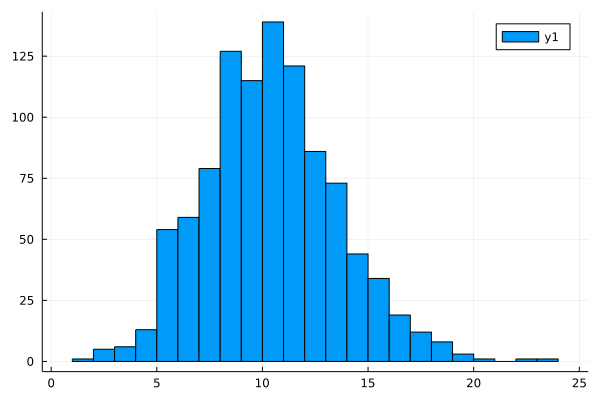

In [18]:
using Plots
plot(histogram(y))

# Q2. Discrete Accept Reject Sampler

In [25]:
println("Enter the value of n")
n = parse(Int64, readline())

println("Enter the value of p")
p = parse(Float64, readline())

println("Enter the value of lambda")
lamda = parse(Int64, readline())

function prop_poisson(n, p, lamda)
    c = 0
    for i in 0:n
        temp = factorial(big(n))*p^i*(1-p)^(n-i)/factorial(big(n-i))*exp(-lamda)*lamda^i
        if temp > c
            c = temp
        end
    end

    while true
        U = rand()
        prop = dit_poisson(U, exp(-lamda), lamda)
        if U < factorial(big(n))*p^prop*(1-p)^(n-prop)/factorial(big(n-prop))*exp(-lamda)*lamda^prop
            return prop
        end
    end
end

Enter the value of n
stdin> 10
Enter the value of p
stdin> 0.2
Enter the value of lambda
stdin> 10


prop_poisson (generic function with 1 method)

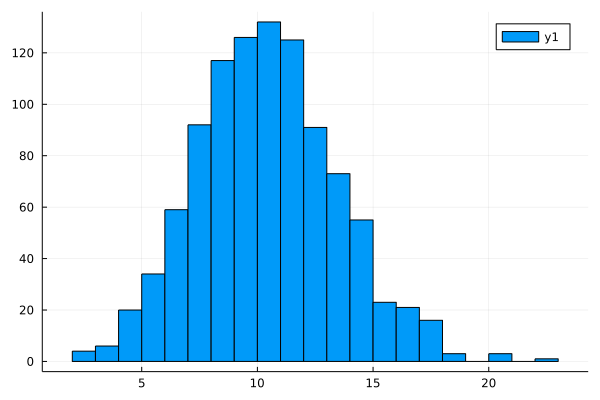

In [26]:
y = []
for i in 0:1000
    push!(y, prop_poisson(n, p, lamda)) 
end
plot(histogram(y))